In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parents[0] if "notebooks" in str(Path.cwd()) else Path.cwd()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))
print("Project root set to:", PROJECT_ROOT)


Project root set to: C:\Users\LENOVO\Desktop\Projects\predictive_maintenance


In [2]:
import pandas as pd
raw_path = PROJECT_ROOT / "data" / "raw" / "simulated_sensor_data.csv"
df = pd.read_csv(raw_path, parse_dates=['timestamp'])
df.head()


,timestamp,machine_id,temperature,vibration,pressure,rpm,failure
0,2025-11-09 12:24:47.878597,1,60.458,0.3524,1.057,1435,0
1,2025-11-09 12:25:47.878597,1,60.477,0.3471,1.053,1430,0
2,2025-11-09 12:26:47.878597,1,60.470,0.3448,1.043,1431,0
3,2025-11-09 12:27:47.878597,1,60.451,0.3315,1.054,1434,0
4,2025-11-09 12:28:47.878597,1,60.494,0.3447,1.041,1433,0


In [3]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
timestamp,9600,2025-11-09 22:24:17.878597120,2025-11-09 12:24:47.878597,2025-11-09 17:24:32.878597120,2025-11-09 22:24:17.878597120,2025-11-10 03:24:02.878597120,2025-11-10 08:23:47.878597,NaN
machine_id,9600.0,4.5,1.0,2.75,4.5,6.25,8.0,2.291407
temperature,9600.0,59.725461,51.62,58.40375,60.143,62.21425,66.924,3.355783
vibration,9600.0,0.54403,-0.1628,0.3734,0.53685,0.6794,1.255,0.267707
pressure,9600.0,1.391372,0.649,1.088,1.359,1.613,2.488,0.380191
rpm,9600.0,1215.028438,782.0,1154.0,1219.5,1289.25,1543.0,142.92413
failure,9600.0,0.013229,0.0,0.0,0.0,0.0,1.0,0.114261


In [4]:
print("Total machines:", df['machine_id'].nunique())
print("Total records:", len(df))
print("Failure counts:")
print(df['failure'].value_counts())


Total machines: 8
Total records: 9600
Failure counts:
failure
0    9473
1     127
Name: count, dtype: int64


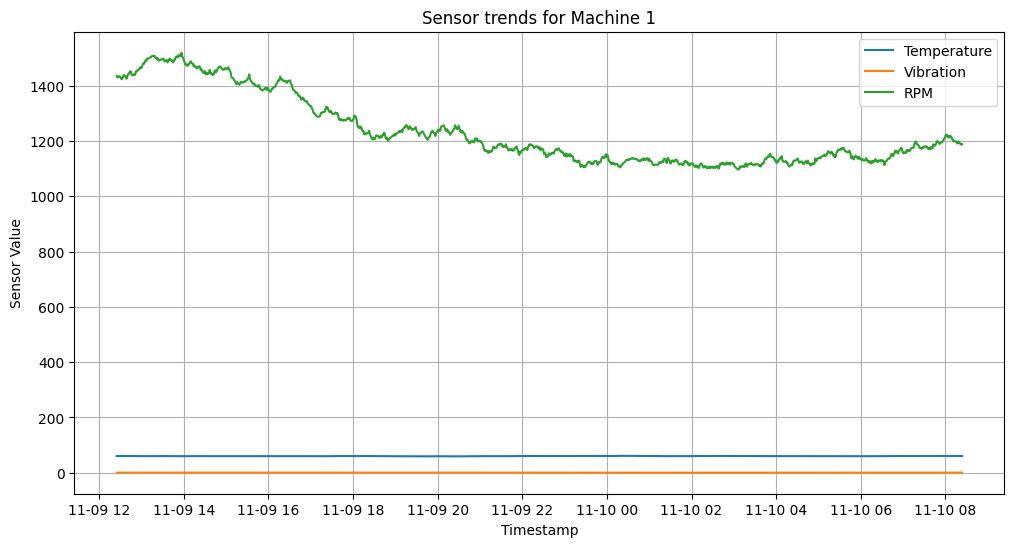

In [5]:
import matplotlib.pyplot as plt

machine = df['machine_id'].unique()[0]   # pick the first machine
subset = df[df['machine_id'] == machine].sort_values('timestamp')

plt.figure(figsize=(12,6))
plt.plot(subset['timestamp'], subset['temperature'], label='Temperature')
plt.plot(subset['timestamp'], subset['vibration'], label='Vibration')
plt.plot(subset['timestamp'], subset['rpm'], label='RPM')
plt.title(f"Sensor trends for Machine {machine}")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Value")
plt.legend()
plt.grid(True)
plt.show()


<Axes: >

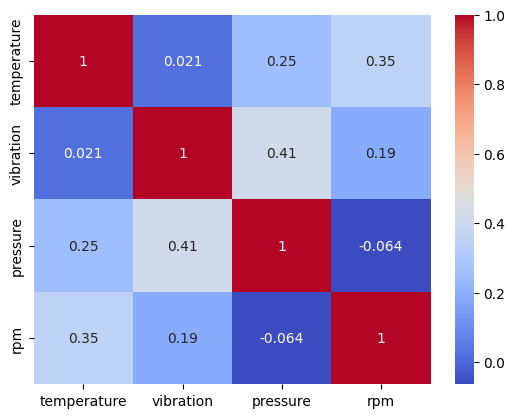

In [6]:
import seaborn as sns
sns.heatmap(df[['temperature', 'vibration', 'pressure', 'rpm']].corr(),
            annot=True, cmap='coolwarm')


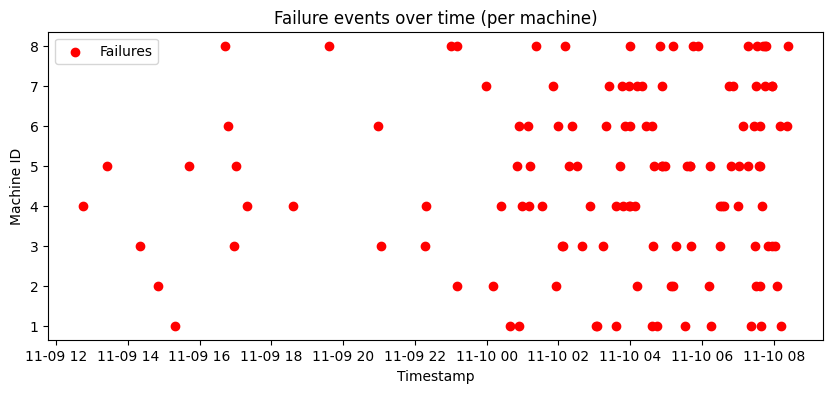

In [7]:
failures = df[df['failure']==1]
plt.figure(figsize=(10,4))
plt.scatter(failures['timestamp'], failures['machine_id'], color='red', label='Failures')
plt.title("Failure events over time (per machine)")
plt.xlabel("Timestamp")
plt.ylabel("Machine ID")
plt.legend()
plt.show()


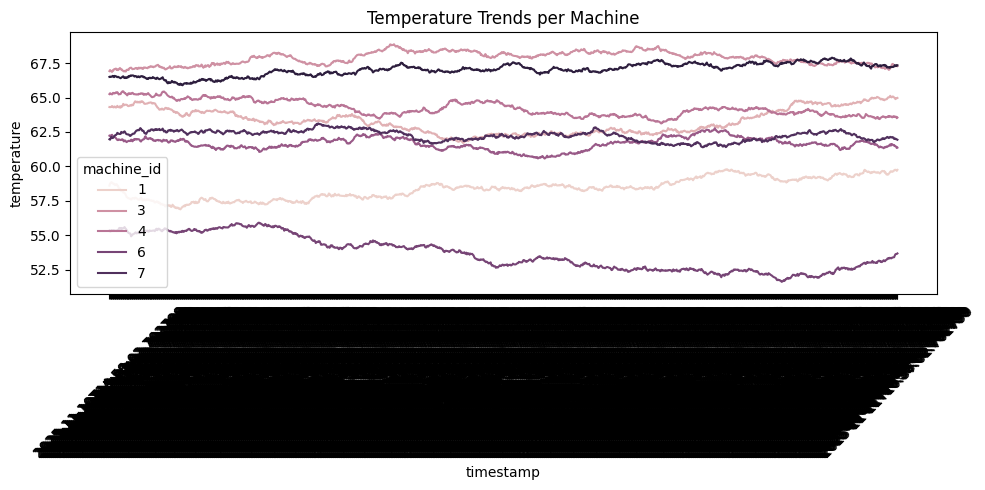

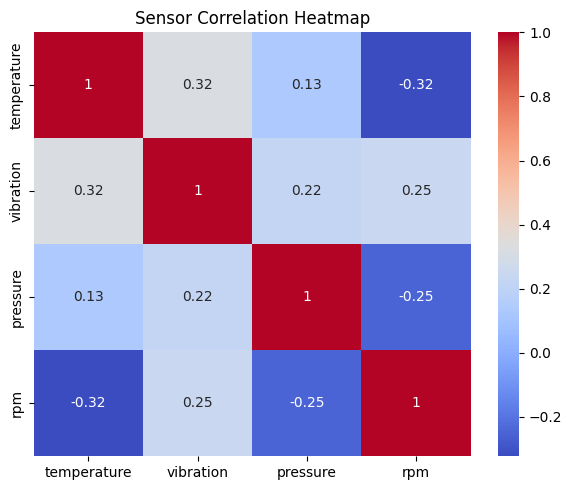

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("../data/raw/simulated_sensor_data.csv")

# Example 1 — Trend over time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='timestamp', y='temperature', hue='machine_id')
plt.xticks(rotation=45)
plt.title("Temperature Trends per Machine")
plt.tight_layout()
plt.savefig("../reports/visuals/eda_visuals_temp_trends.png", bbox_inches='tight')
plt.show()

# Example 2 — Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['temperature','vibration','pressure','rpm']].corr(), annot=True, cmap='coolwarm')
plt.title("Sensor Correlation Heatmap")
plt.tight_layout()
plt.savefig("../reports/visuals/eda_visuals_corr.png", bbox_inches='tight')
plt.show()
